In [2]:
# Step 1: Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Step 2: Prepare the data

stock_data=pd.read_excel('C:\\Users\\Kasutaja\Downloads\\stock_change.xlsx')
X_stock = stock_data[['PriceChange', 'VolumeChange']]
y_stock = stock_data['Direction']

In [4]:
# Step 3: Create the model with specified parameters

svm_model = SVC(kernel='poly',C=1,degree=3, gamma='auto')

In [112]:
# Step 4: Split the model into test and training data

X_stock_train, X_stock_test, y_stock_train, y_stock_test = train_test_split(X_stock, y_stock, test_size=0.2)

In [113]:
# Step 5: Train the model

svm_model.fit(X_stock_train, y_stock_train)

SVC(C=1, gamma='auto', kernel='poly')

In [114]:
# Step 6: Make predictions

svm_predictions = svm_model.predict(X_stock_test)

In [115]:
# Step 6: Make predictions

svm_predictions = svm_model.predict(X_stock_test)

In [116]:
# Step 7: Evaluate the model

svm_accuracy = accuracy_score(y_stock_test, svm_predictions)
precision_svm = precision_score(y_stock_test, svm_predictions)
recall_svm = recall_score(y_stock_test, svm_predictions)

print(f"SVM Accuracy ((TP+TN)/Total): {round(svm_accuracy, 2)}")
print(f"SVM Precision (TP/Predicted 1): {round(precision_svm, 2)}")
print(f"SVM Recall (TP/Actual 1): {round(recall_svm, 2)}")

SVM Accuracy ((TP+TN)/Total): 0.7
SVM Precision (TP/Predicted 1): 1.0
SVM Recall (TP/Actual 1): 0.57


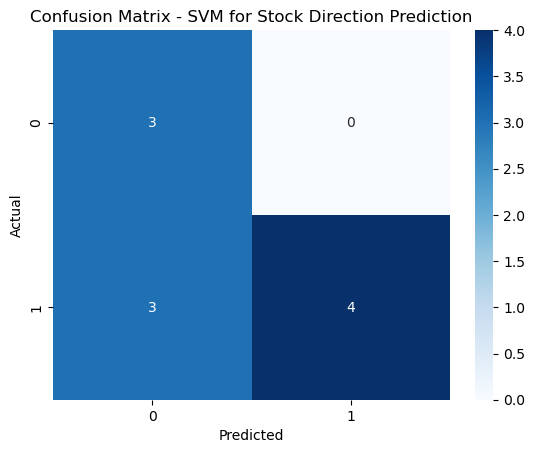

In [117]:
# Visualization of Evaluation Metrics

sns.heatmap(confusion_matrix(y_stock_test, svm_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM for Stock Direction Prediction')
plt.show()

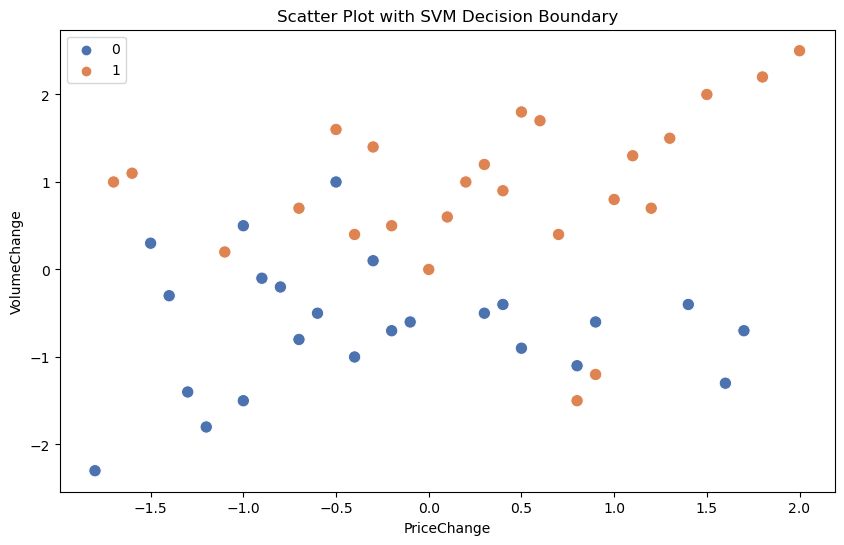

In [118]:
# Visualisation of SVM

plt.figure(figsize=(10, 6))

# Scatter plot of the data points
sns.scatterplot(x='PriceChange', y='VolumeChange', hue='Direction', data=stock_data, palette='deep', s=80)

plt.xlabel('PriceChange')
plt.ylabel('VolumeChange')
plt.title('Scatter Plot with SVM Decision Boundary')
plt.legend()
plt.show()

In [1]:
# Plot the decision boundary

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 6))

# Scatter plot of the data points
sns.scatterplot(x='PriceChange', y='VolumeChange', hue='Direction', data=stock_data, palette='deep', s=80)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('PriceChange')
plt.ylabel('VolumeChange')
plt.title('Scatter Plot with SVM Decision Boundary')
plt.legend()

NameError: name 'plt' is not defined